Everything is a network. [Assortativity](http://arxiv.org/pdf/cond-mat/0205405v1.pdf) is an interesting property of networks. It is the tendency of nodes in a network to be attached to other nodes that are similar in some way. In social networks, this is sometimes called "homophily."

One kind of assortativity that is particularly descriptive of network topology is *degree assortativity*. This is what it sounds like: the *assortativity* (tendency of nodes to attach to other nodes that are similar) of *degree* (the number of edges a node has).

A suggestive observation by [Newman (2002)](http://arxiv.org/pdf/cond-mat/0205405v1.pdf) is that *social* networks such as academic coauthorship networks and film collaborations tend to have positive degree assortativity, while *technical* and *biological* networks tend to have negative degree assortativity. Another way of saying this is that they are *disassortatively mixed*. This has implications for the ways we model these networks forming as well as the robustness of these networks to the removal of nodes.

Looking at open source software collaboration as a *sociotechnical* system, we can ask whether and to what extent the networks of activity are assortatively mixed. Are these networks more like social networks or technical networks? Or are they something in between?

### Email reply networks

One kind of network that we can extract from open source project data are networks of email replies from public mailing lists. [Mailing lists and discussion forums](http://producingoss.com/en/message-forums.html) are often the first point of contact for new community members and can be the site of non-technical social processes that are necessary for the maintenance of the community. Of all the communications media used in coordinating the cooperative work of open source development, mailing lists are the most "social".

We are going to look at the mailing lists associated with a number of open source and on-line collaborative projects. We will construct for each list a network for which nodes are email senders (identified by their email address) and edges are the number of times a sender has replied directly to another participant on the list. Keep in mind that these are public discussions and that in a sense every reply is sent to everybody.

In [24]:
from bigbang.archive import Archive

urls = [  # "analytics",
    "conferences",
    "design",
    "education",
    "gendergap",
    "historic",
    "hot",
    "ietf-privacy",
    "ipython-dev",
    "ipython-user",
    "languages",
    "maps-l",
    "numpy-discussion",
    "playground",
    "potlatch-dev",
    "python-committers",
    "python-dev",
    "scipy-dev",
    "scipy-user",
    "social-media",
    "spambayes",
    # "wikien-l",
    "wikimedia-l",
]

archives = [(url, Archive(url, archive_dir="../archives")) for url in urls]

archives = dict(archives)

The above code reads in preprocessed email archive data. These mailing lists are from a variety of different sources:

|List name | Project  | Description |
|---|---|---|
|analytics| Wikimedia  |   |
|conferences| Python  |   |
|design| Wikimedia  |   |
|education| Wikimedia |   |
|gendergap| Wikimedia |   |
|historic| OpenStreetMap |   |
|hot| OpenStreetMap | Humanitarian OpenStreetMap Team  |
|ietf-privacy| IETF |   |
|ipython-dev| IPython  | Developer's list |
|ipython-user| IPython  | User's list  |
|languages| Wikimedia |   |
|maps-l| Wikimedia |   |
|numpy-discussion| Numpy  |   |
|playground| Python  |   |
|potlatch-dev| OpenStreetMap |   |
|python-committers| Python |   |
|python-dev| Python |   |
|scipy-dev| SciPy  | Developer's list|
|scipy-user| SciPy | User's list |
|social-media| Wikimedia  |   |
|spambayes| Python |   |
|wikien-l| Wikimedia  | English language Wikipedia |
|wikimedia-l| Wikimedia |   |


In [25]:
import bigbang.graph as graph

igs = dict(
    [
        (k, graph.messages_to_interaction_graph(v.data))
        for (k, v) in list(archives.items())
    ]
)

In [26]:
igs

{'conferences': <networkx.classes.digraph.DiGraph at 0x7ff2ccbd5d10>,
 'design': <networkx.classes.digraph.DiGraph at 0x7ff30b6e0c90>,
 'education': <networkx.classes.digraph.DiGraph at 0x7ff31416f090>,
 'gendergap': <networkx.classes.digraph.DiGraph at 0x7ff30ed4e810>,
 'historic': <networkx.classes.digraph.DiGraph at 0x7ff31419fb50>,
 'hot': <networkx.classes.digraph.DiGraph at 0x7ff30af72110>,
 'ietf-privacy': <networkx.classes.digraph.DiGraph at 0x7ff30b840cd0>,
 'ipython-dev': <networkx.classes.digraph.DiGraph at 0x7ff309fbb090>,
 'ipython-user': <networkx.classes.digraph.DiGraph at 0x7ff316f8e190>,
 'languages': <networkx.classes.digraph.DiGraph at 0x7ff3177e2810>,
 'maps-l': <networkx.classes.digraph.DiGraph at 0x7ff313fa9a10>,
 'numpy-discussion': <networkx.classes.digraph.DiGraph at 0x7ff313f333d0>,
 'playground': <networkx.classes.digraph.DiGraph at 0x7ff314154190>,
 'potlatch-dev': <networkx.classes.digraph.DiGraph at 0x7ff303d3cd50>,
 'python-committers': <networkx.classes.

Now we have processed the mailing lists into interaction graphs based on replies. This is what those graphs look like:

In [20]:
import networkx as nx


def draw_interaction_graph(ig):
    pos = nx.graphviz_layout(ig, prog="neato")
    node_size = [data["sent"] * 4 for name, data in ig.nodes(data=True)]

    nx.draw(
        ig,
        pos,
        node_size=node_size,
        node_color="b",
        alpha=0.4,
        font_size=18,
        font_weight="bold",
    )

    # edge width is proportional to replies sent
    edgewidth = [d["weight"] for (u, v, d) in ig.edges(data=True)]

    # overlay edges with width based on weight
    nx.draw_networkx_edges(ig, pos, alpha=0.5, width=edgewidth, edge_color="r")

In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt

wikimedia-l

	"Tomek \"Polimerek\" Ganicz"	 [height=0.5,
                   ^
Expected "}" (at char 16168), (line:474, col:20)
plotting failure
languages
social-media
education
gendergap

Graphviz layout with neato failed
()
To debug what happened try:
P=pydot_from_networkx(G)
P.write_dot("file.dot")
And then run neato on file.dot
plotting failure
scipy-dev

Graphviz layout with neato failed
()
To debug what happened try:
P=pydot_from_networkx(G)
P.write_dot("file.dot")
And then run neato on file.dot
plotting failure
conferences
ipython-user
numpy-discussion
spambayes
plotting failure
hot
plotting failure
historic
plotting failure
design
plotting failure
playground
plotting failure
ipython-dev
plotting failure
scipy-user

Graphviz layout with neato failed
()
To debug what happened try:
P=pydot_from_networkx(G)
P.write_dot("file.dot")
And then run neato on file.dot
plotting failure
ietf-privacy
plotting failure
maps-l

Graphviz layout with neato failed
()
To debug what happened try:
P=p

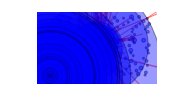

In [27]:
plt.figure(550, figsize=(12.5, 7.5))
for ln, ig in list(igs.items()):
    print(ln)
    try:
        plt.subplot(550 + i)
        # print nx.degree_assortativity_coefficient(ig)
        draw_interaction_graph(ig)
    except:
        print("plotting failure")

plt.show()

Well, that didn't work out so well...

I guess I should just go on to compute the assortativity directly.

This is every mailing list, with the total number of nodes and its degree assortativity computed.

In [31]:
for ln, ig in list(igs.items()):
    print(ln, len(ig.nodes()), nx.degree_assortativity_coefficient(ig, weight="weight"))

 wikimedia-l 2101 -0.150058293384
languages 26 -0.314243048003
social-media 49 -0.203524310454
education 182 0.0283821595858
gendergap 342 -0.14806999936
scipy-dev 1151 -0.264070315321
conferences 128 -0.143192880716
ipython-user 1237 -0.246257851784
numpy-discussion 108 -0.128225732455
spambayes 5938 -0.312923245141
hot 599 -0.183845789651
historic 70 -0.188612283229
design 120 -0.180682926208
playground 24 -0.50373976789
ipython-dev 783 -0.225790909548
scipy-user 3318 -0.175387964746
ietf-privacy 40 -0.21378045356
maps-l 132 -0.167597020115
python-committers 121 -0.205640931551
python-dev 3243 -0.190511230896
potlatch-dev 84 -0.0624867746661


Maybe it will be helpful to compare these values to those in the Newman, 2002 paper:
<img src="assortativity-values.png">

On the whole, with a few exceptions, these reply networks wind up looking much more like technical or biological networks than the social networks of coauthorship and collaboration. Why is this the case?

One explanation is that the mechanism at work in creating these kinds of "interaction" networks over time is very different from the mechanism for creating collaboration or coauthorship networks. These networks are derived from real communications over time in projects actively geared towards encouraging new members and getting the most out of collaborations. Perhaps these kinds of assortativity numbers are typical in projects with leaders who have inclusivity as a priority.

Another possible explanation is that these interaction networks are mirroring the structures of the technical systems that these communities are built around. There is a theory of [institutional isomorphism](http://www.jstor.org/discover/10.2307/2095101?sid=21105865961831&uid=2&uid=70&uid=2129&uid=3739560&uid=3739256&uid=4) that can be tested in this case, where social and technical institutions are paired.

### Directions for future work

Look at each project domain (IPython, Wikimedia, OSM, etc.) separately but include multiple lists from each and look at assortativity within list as well as across list. This would get at how the cyberinfrastructure topology affects the social topology of the communities that use it.

Use a more systematic sampling of email lists to get a typology of those lists with high and low assortativity. Figure out qualitatively what the differences in structure might mean (can always go in and *read the emails*).

Build a generative graph model that with high probability creates networks with this kind of structure (apparently the existing models don't do thise well.) Test its fit across many interaction graphs, declare victory for science of modeling on-line collaboration.

### References

http://producingoss.com/en/message-forums.html

http://arxiv.org/abs/cond-mat/0205405
http://arxiv.org/pdf/cond-mat/0205405v1.pdf

http://arxiv.org/abs/cond-mat/0209450

http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2005302

http://www.jstor.org/discover/10.2307/2095101?sid=21105865961831&uid=2&uid=70&uid=2129&uid=3739560&uid=3739256&uid=4